In [1]:
# ---- USER AVG. RATING DEVIATION vs. HELPFULNESS --------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import gzip

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')



In [3]:
df = getDF('reviews_Electronics_5.json.gz')

In [4]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [5]:
def num_votes(arr) :
    return arr[1]

def helpfulness_score(arr) : 
    if arr[1] >0 :
        return arr[0]/arr[1]
    return 0


In [6]:
MIN_VOTES = 10

In [7]:
df2 = df[df['helpful'].apply(num_votes) >= MIN_VOTES]


In [8]:
df2['helpfulness_score'] = df2['helpful'].apply(helpfulness_score)

C:\Users\Trishul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
len(df2)

107502

In [10]:
user_df = pd.read_csv("User_Avg_Rating_Deviation", index_col='reviewerID')

In [11]:
user_df.head()

,rating_deviation
reviewerID,
A000715434M800HLCENK9,1.377000
A00101847G3FJTWYGNQA,0.516270
A00166281YWM98A3SVD55,0.554858
A0046696382DWIPVIWO0K,1.094410
A00472881KT6WR48K907X,0.481824


In [12]:
user_df.loc['A000715434M800HLCENK9'][0]

1.3770003156389832

In [13]:
def get_rating_deviation(reviewerID):
    return user_df.loc[reviewerID][0]

In [14]:
df2['user_deviation'] = df2.apply(lambda row: get_rating_deviation(row['reviewerID']), axis=1)

C:\Users\Trishul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulness_score,user_deviation
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",0.800000,1.399189
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",0.955556,0.624437
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",0.900000,0.510375
56,A3QH8VQDE7HZCR,0972683275,costaricachris,"[15, 19]",Quality was excellent. Instructions were clear...,5.0,Real value for the money,1286236800,"10 5, 2010",0.789474,0.442171
82,A38FGQVJM18OWV,0972683275,"George S. Mitchell ""gsmitchell""","[8, 18]",I checked around Amazon as well as some other ...,1.0,What a piece of junk!,1291161600,"12 1, 2010",0.444444,1.616074


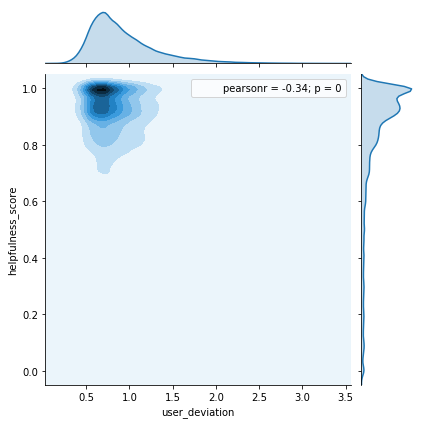

In [16]:
sns.jointplot(x='user_deviation', y='helpfulness_score', data=df2, kind='kde')

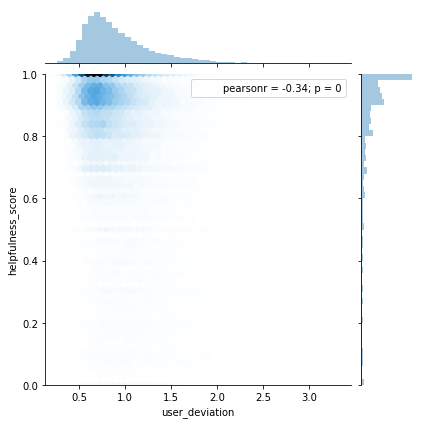

In [55]:
sns.jointplot(x='user_deviation', y='helpfulness_score', data=df2, kind='hex')

In [18]:
## IMPACT OF USER QUICKNESS / DELAY on HELPFULNESS

In [17]:
firstreview_df=df2[['asin','unixReviewTime']].groupby('asin').min()

In [19]:
def delay_calculate(product_id,review_time):
    first_review = firstreview_df.loc[product_id]['unixReviewTime']
    return review_time-first_review

In [20]:
df2['review_delay'] = df2.apply(lambda row: delay_calculate(row['asin'],row['unixReviewTime']), axis=1)

C:\Users\Trishul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulness_score,user_deviation,review_delay
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",0.800000,1.399189,6652800
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",0.955556,0.624437,0
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",0.900000,0.510375,6566400
56,A3QH8VQDE7HZCR,0972683275,costaricachris,"[15, 19]",Quality was excellent. Instructions were clear...,5.0,Real value for the money,1286236800,"10 5, 2010",0.789474,0.442171,2678400
82,A38FGQVJM18OWV,0972683275,"George S. Mitchell ""gsmitchell""","[8, 18]",I checked around Amazon as well as some other ...,1.0,What a piece of junk!,1291161600,"12 1, 2010",0.444444,1.616074,7603200


In [23]:
userdelay_df = df2[['reviewerID','review_delay']].groupby('reviewerID').mean()

In [24]:
userdelay_df.head()

,review_delay
reviewerID,
A0103849GBVWICKXD4T6,0.0
A0191512Q2Z9IPUAE2RZ,33955200.0
A0266076X6KPZ6CCHGVS,8726400.0
A05793033A673QTUT56XZ,15206400.0
A08364961O0V6UJTPJB0D,25228800.0


In [25]:
userdelay_df.to_csv("User_Delay")

In [28]:
df2.to_csv('Amazon_Gt_10')

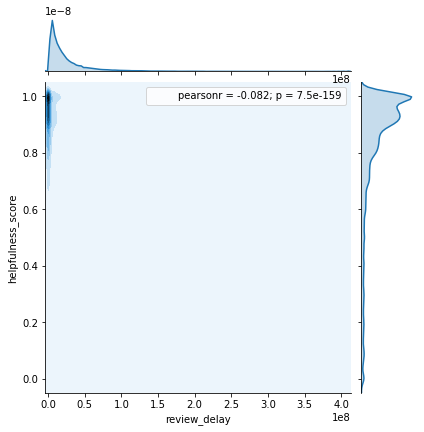

In [27]:
sns.jointplot(x='review_delay', y='helpfulness_score', data=df2, kind='kde')

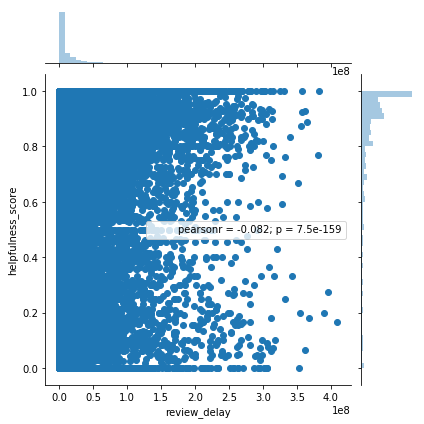

In [29]:
sns.jointplot(x='review_delay', y='helpfulness_score', data=df2, kind='scatter')

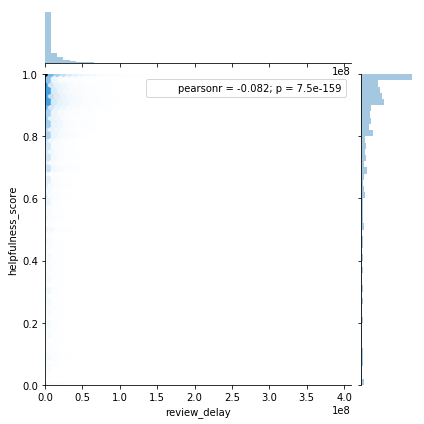

In [30]:
sns.jointplot(x='review_delay', y='helpfulness_score', data=df2, kind='hex')

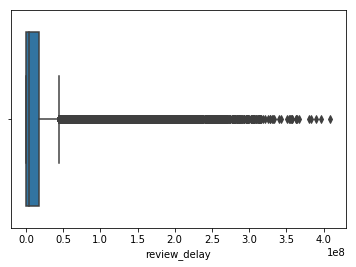

In [31]:
sns.boxplot(x=df2['review_delay'])

In [32]:
def get_delay(reviewerID):
    return userdelay_df.loc[reviewerID][0]

In [33]:
df2['user_delay'] = df2.apply(lambda row: get_delay(row['reviewerID']), axis=1)


C:\Users\Trishul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


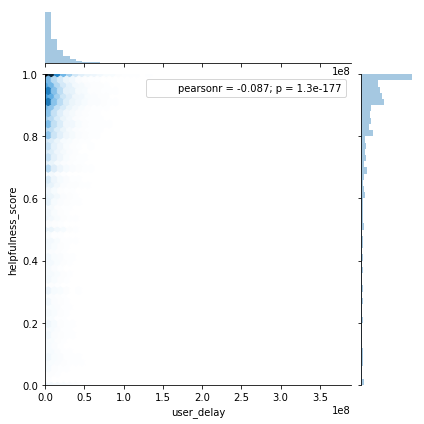

In [35]:
sns.jointplot(x='user_delay', y='helpfulness_score', data=df2, kind='hex')

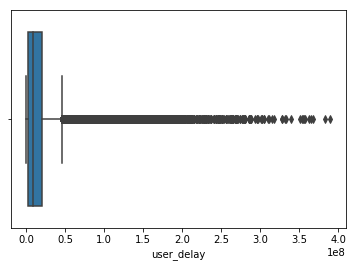

In [36]:
sns.boxplot(x=df2['user_delay'])

In [43]:
delay_quantiles=df2['user_delay'].quantile([0,0.25,0.75,1])
Q1 = delay_quantiles[0.25]
Q3 = delay_quantiles[0.75]
IQR = Q3-Q1
threshold = Q3 + 1.5* IQR

In [44]:
threshold

46310400.0

In [48]:
df2['user_delay_filtered']= df2[df2['user_delay']<= threshold]['user_delay']

C:\Users\Trishul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


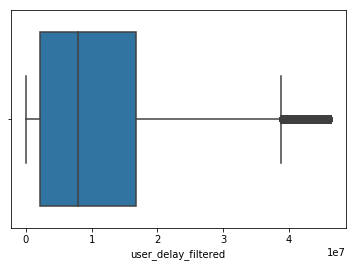

In [49]:
sns.boxplot(x=df2['user_delay_filtered'])

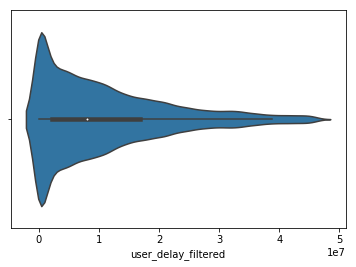

In [56]:
sns.violinplot(x=df2['user_delay_filtered'])

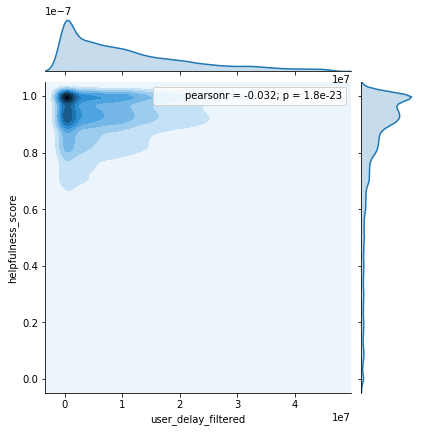

In [54]:
sns.jointplot(x='user_delay_filtered', y='helpfulness_score', data=df2, kind='kde')

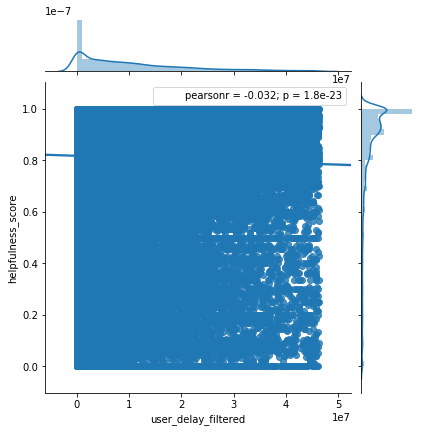

In [57]:
sns.jointplot(x='user_delay_filtered', y='helpfulness_score', data=df2, kind='reg')

In [58]:
df2['helpfulness_score'].corr(df2['user_delay_filtered'])

-0.031606723093684022

-0.33924046315795309

In [2]:
## TAKEN FROM FINAL FILE ##
user_df = review_df[['reviewerID','reviewerName','reviewText','user_deviation']]

user_delay_df = pd.read_csv('User_Delay',index_col='reviewerID') 

user_delay_df.head()

def get_delay(reviewerID):
    return user_delay_df.loc[reviewerID][0]

user_df['user_delay']= user_df['reviewerID'].apply(get_delay)

user_df.head()

user_df.to_csv('User_DF.csv')